In [1]:
import cv2
import imutils
import matplotlib.pyplot as plt
import json
import numpy as np
import math
from shapely.geometry import Point

# Bounding Box Coordinates from Object Detection Model


In [20]:
data_dict = eval("{'lst_image_objects': [{'class': 'tl_NA', 'confidence': 26, 'x_start': 488, 'y_start': 217, 'width': 9, 'height': 17}, {'class': 'tl_NA', 'confidence': 28, 'x_start': 150, 'y_start': 161, 'width': 12, 'height': 31}, {'class': 'tl_G', 'confidence': 28, 'x_start': 150, 'y_start': 160, 'width': 12, 'height': 32}, {'class': 'tl_NA', 'confidence': 28, 'x_start': 504, 'y_start': 208, 'width': 10, 'height': 19}, {'class': 'tl_NA', 'confidence': 46, 'x_start': 553, 'y_start': 179, 'width': 13, 'height': 24}, {'class': 'car', 'confidence': 55, 'x_start': 396, 'y_start': 274, 'width': 30, 'height': 35}, {'class': 'traffic sign', 'confidence': 56, 'x_start': 610, 'y_start': 117, 'width': 27, 'height': 28}, {'class': 'car', 'confidence': 66, 'x_start': 493, 'y_start': 265, 'width': 45, 'height': 39}, {'class': 'car', 'confidence': 87, 'x_start': 183, 'y_start': 262, 'width': 79, 'height': 83}, {'class': 'car', 'confidence': 89, 'x_start': 417, 'y_start': 269, 'width': 86, 'height': 72}, {'class': 'car', 'confidence': 90, 'x_start': 248, 'y_start': 234, 'width': 163, 'height': 172, 'blur_coord': [{'x_start': 313, 'y_start': 307, 'width': 29, 'height': 18}]}, {'class': 'car', 'confidence': 90, 'x_start': 498, 'y_start': 224, 'width': 179, 'height': 197}, {'class': 'car', 'confidence': 92, 'x_start': 4, 'y_start': 264, 'width': 215, 'height': 146, 'blur_coord': [{'x_start': 15, 'y_start': 322, 'width': 38, 'height': 21}]}], 'summeryClasses': {'no_of_tl_NA': 4, 'no_of_tl_G': 1, 'no_of_car': 7, 'no_of_traffic sign': 1}}")

In [21]:
data_dict=data_dict['lst_image_objects'][-3]

# Load random Image

In [90]:
img = cv2.imread('sample2/frame1398.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [91]:
x1 = data_dict['x_start']
y1 = data_dict['y_start']
x2 = x1+data_dict['width']
y2 = y1+data_dict['height']

x1 = int(x1+data_dict['width'])
y1 = int(y1+data_dict['height'])
x2 = int(x2-data_dict['width'])
y2 = int(y2-data_dict['height'])

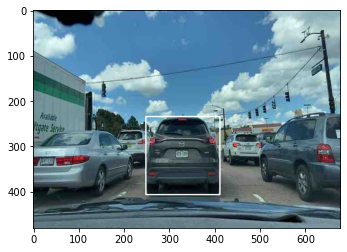

In [92]:
cv2.rectangle(img, (x1, y1), (x2, y2), (255,255,255), 2)
plt.imshow(img)

# Extract ROI

In [93]:
mask = np.zeros_like(img)

In [96]:
def get_roi(vertices, img):    
    mask = np.zeros_like(img)
    polygon = np.array([vertices],dtype = np.int32 )
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    cv2.fillPoly(mask, polygon, ignore_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [94]:
vertices = [[x1,y1],[x1,y2],[x2,y2],[x2,y1],[x1,y1]]


In [95]:
polygon = np.array([vertices],dtype = np.int32 )
if len(img.shape) > 2:
    channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
    ignore_mask_color = (255,) * channel_count
else:
    ignore_mask_color = 255

In [97]:
cv2.fillPoly(mask, polygon, ignore_mask_color)
masked_image = cv2.bitwise_and(img, mask)

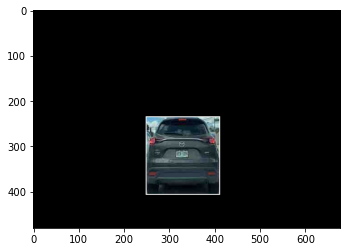

In [98]:
plt.imshow(masked_image)

In [99]:
blurred = cv2.GaussianBlur(masked_image, (1, 1), 0)
hsv = cv2.cvtColor(masked_image, cv2.COLOR_RGB2HSV)

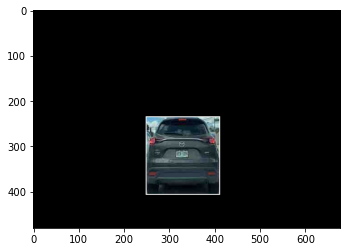

In [100]:
plt.imshow(blurred)

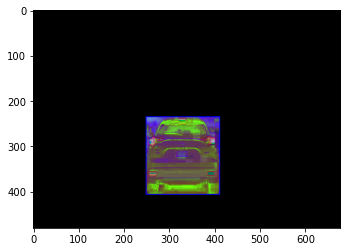

In [101]:
plt.imshow(hsv)

In [102]:
startRedLower = (0 , 120 , 90)
startRedUpper = (10 , 255, 255)
endRedLower = (170 , 160 , 90)
endRedUpper = (180 , 255 , 255)

white_lower = (0 , 0 , 255)
white_upper = (179 , 20 , 255)

In [103]:
mask1 = cv2.inRange(hsv,startRedLower,startRedUpper)
mask2 = cv2.inRange(hsv,endRedLower,endRedUpper)
mask3 = cv2.inRange(hsv,white_lower,white_upper)

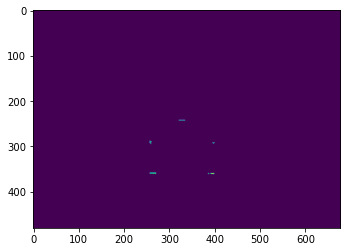

In [104]:
plt.imshow(mask1)

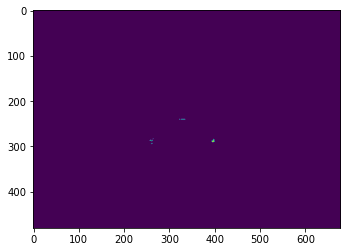

In [105]:
plt.imshow(mask2)


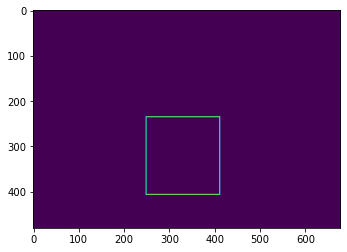

In [106]:
plt.imshow(mask3)


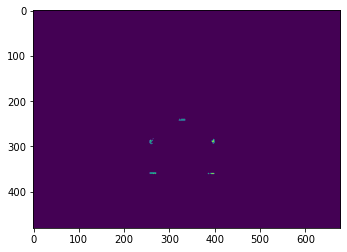

In [107]:
maskRed = mask1+mask2
# maskRed = cv2.erode(maskRed, None, iterations=1)
plt.imshow(maskRed)

In [108]:
cnts = cv2.findContours(maskRed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
def get_cropped_red_area(cnts,img):
    boxes = []
    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        boxes.append([x,y, x+w,y+h])

    boxes = np.asarray(boxes)
    x1, y1 = np.min(boxes, axis=0)[:2]
    x2, y2 = np.max(boxes, axis=0)[2:]
    h = data_dict['height']
    vertices = [[x1,y1],[x1,y2],[x2,y2],[x2,y1],[x1,y1]]

    return get_roi(vertices,img)
red_cropped_img = get_cropped_red_area(cnts,img)

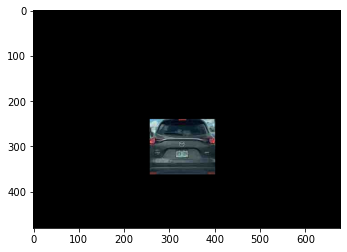

In [109]:
plt.imshow(red_cropped_img)

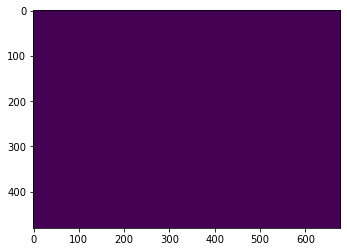

In [110]:
# blurred = cv2.GaussianBlur(red_cropped_img, (5, 5), 0)
hsv = cv2.cvtColor(red_cropped_img, cv2.COLOR_RGB2HSV)
mask3 = cv2.inRange(hsv,white_lower,white_upper)
plt.imshow(mask3)

In [111]:
maskRed = mask1+mask2

In [114]:
from skimage import measure

labels = measure.label(maskRed, neighbors=4, background=0)
mask = np.zeros(maskRed.shape, dtype="uint8")
# loop over the unique components
for label in np.unique(labels):
# if this is the background label, ignore it
    if label == 0:
        continue
# otherwise, construct the label mask and count the# number of pixels 
    labelMask = np.zeros(maskRed.shape, dtype="uint8")
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)
# if the number of pixels in the component is sufficiently
# large, then add it to our mask of "large blobs"
    if numPixels > 1 and numPixels <250:
        mask = cv2.add(mask, labelMask)

<ipython-input-114-3f83f86c5626>:3: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=4, use connectivity=1
  labels = measure.label(maskRed, neighbors=4, background=0)


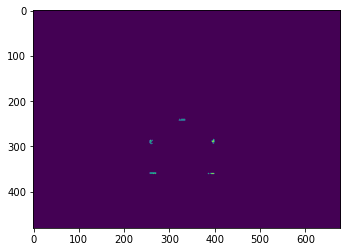

In [115]:
plt.imshow(mask)

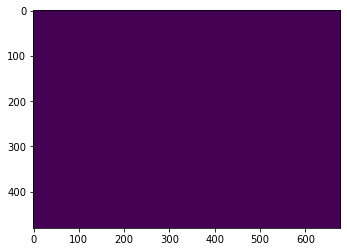

In [116]:
maskRed = cv2.erode(mask, None, iterations=1)
plt.imshow(maskRed)

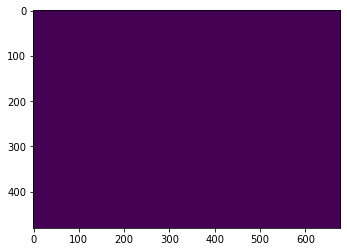

In [117]:
maskRed = cv2.dilate(maskRed, None, iterations=2)
plt.imshow(maskRed)

In [87]:
contours , hierarchy = cv2.findContours(maskRed.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contours

[array([[[258, 287]],
 
        [[258, 291]],
 
        [[259, 292]],
 
        [[263, 292]],
 
        [[264, 291]],
 
        [[264, 287]]], dtype=int32),
 array([[[404, 278]],
 
        [[404, 282]],
 
        [[408, 282]],
 
        [[408, 278]]], dtype=int32),
 array([[[321, 239]],
 
        [[321, 243]],
 
        [[335, 243]],
 
        [[335, 239]]], dtype=int32)]

In [88]:
hull = []
font = cv2.FONT_HERSHEY_SIMPLEX

indHull = []
from scipy.spatial.distance import euclidean
xCenter = (x1 + x2) / 2
yCenter = (y1 + y2) / 2
cy = []
cx = []
bbox = []
e_distance = []
from sklearn.metrics import pairwise
mask = np.zeros_like(img)
for i in range(len(contours)):
    contourVar = contours[i]
    chull = cv2.convexHull(contourVar , False)
    extreme_top    = tuple(chull[chull[:, :, 1].argmin()][0])
    extreme_bottom = tuple(chull[chull[:, :, 1].argmax()][0])
    extreme_left   = tuple(chull[chull[:, :, 0].argmin()][0])
    extreme_right  = tuple(chull[chull[:, :, 0].argmax()][0])
    cX = int((extreme_left[0] + extreme_right[0]) / 2)
    cY = int((extreme_top[1] + extreme_bottom[1]) / 2)
    
    cx.append(cX)
    cy.append(cY)
    e_distance.append(euclidean((xCenter,yCenter),(cX, cY)))
    distance = pairwise.euclidean_distances([(cX, cY)], Y=[extreme_left, extreme_right, extreme_top, extreme_bottom])[0]
    
    radius = int(distance[distance.argmax()])
    hull.append(chull)
    if  radius >=55 :
        # cv2.circle(frame, (int(cX), int(cY)), int(radius),(167,133,0), 2)
        bbox.append([extreme_bottom,extreme_top, extreme_left,extreme_right])
        indHull.append(i)
print('length')
print(len(contours))        
final_cont = []
import shapely.geometry
for ci in range(len(contours)):
    p = shapely.geometry.Polygon(np.squeeze(contours[ci]))
    print('area', p.area)
    centroid_ = np.array(p.centroid)
    x1,y1 = int(centroid_[0]), int(centroid_[1])
    θ = 0 * 3.14 / 180.0
    x2 = x1 + 5000 * math.cos(θ)
    y2 = y1 + 5000 * math.sin(θ) 
#     if p.convex_hull.area > 200:
#         continue
    line = shapely.geometry.LineString([[x1, y1], [x2, y2]])
    for cj in range(ci+1, len(contours)):
        poly1 = shapely.geometry.Polygon(np.squeeze(contours[cj]))
        pair_aspect_ratio = get_pair_aspect_ratio(p, poly1)
        print('pair aspect {}'.format(pair_aspect_ratio))

        if p.convex_hull.symmetric_difference(poly1.convex_hull)  and (3<pair_aspect_ratio<8):
            print('pair aspect {}'.format(pair_aspect_ratio))
            final_cont.append(
                ci)
            final_cont.append(cj)
       
# # draw contours and hull points
# for i in indHull:
#     # draw ith contour
#     cv2.drawContours(img, contours, i, (255, 0, 0), 1, 18, hierarchy)
#     # draw ith convex hull object
#     cv2.drawContours(img, hull, i, (255, 0, 0), 2, 18)
img = cv2.imread('nightBrake_light/frame829.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)    
def poly_to_bbox(vertices):
    x1 = min([f[0] for f in vertices])
    y1 = min([f[1] for f in vertices])
    x2 = max([f[0] for f in vertices])
    y2 = max([f[1] for f in vertices])
    return [x1,y1,x2,y2]

boxes = []
for c in final_cont:
    (x, y, w, h) = cv2.boundingRect(contours[c])
    boxes.append([x,y, x+w,y+h])

boxes = np.asarray(boxes)
x1, y1 = np.min(boxes, axis=0)[:2]
x2, y2 = np.max(boxes, axis=0)[2:]
cv2.rectangle(img, (x1, y1), (x2, y2), (255,255,144), 2)
center_x = (x1+x2)//2
center_y = (y1+y2)//2

cv2.putText(img,"Brake.",(x1 ,y1-20), font, 1.2,(0, 255, 255),2,cv2.LINE_AA)

    
for cn in final_cont:
    rect_cords = poly_to_bbox(np.squeeze(contours[cn]))
    x = int(rect_cords[0]+rect_cords[2] /2)
    y = int(rect_cords[1]+rect_cords[3] /2)
    cv2.rectangle(img, (rect_cords[0], rect_cords[1]), (rect_cords[2], rect_cords[3]), (0,255,144), 2)
#     cv2.putText(img,"Brake.",(rect_cords[0] ,rect_cords[1]), font, 1.2,(0, 255, 255),2,cv2.LINE_AA)
plt.imshow(img)

length
3
area 29.0
pair aspect 31.130946058048664
pair aspect 16.001543135461947
area 16.0
pair aspect 19.3423111338847
area 56.0


ValueError: zero-size array to reduction operation minimum which has no identity

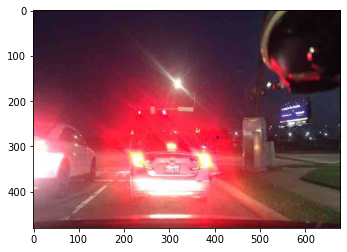

In [84]:
cv2.drawContours(img, contours, 1, (0, 0, 255), 1, 18, hierarchy)
plt.imshow(img)

In [1265]:
import math

In [1266]:
x1 = cx[1]
y1 = cy[1]
x1,y1
θ = 5 * 3.14 / 180.0
x2 = x1 + 200 * math.cos(θ)
y2 = y1 + 200 * math.sin(θ) 
# and θ should be in radians



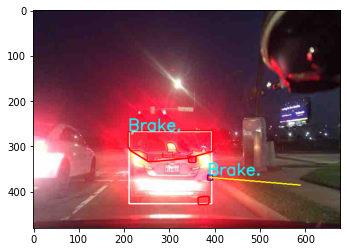

In [1267]:
cv2.line(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 255, 0), 2)
plt.imshow(img)

In [1268]:
line = shapely.geometry.LineString([[x1, y1], [x2, y2]])
poly1 = shapely.geometry.Polygon(np.squeeze(contours[cj]))


In [1269]:
x1,y1 = cx[ci],cy[ci]
θ = 0 * 3.14 / 180.0
x2 = x1 + 5000 * math.cos(θ)
y2 = y1 + 5000 * math.sin(θ) 
line = shapely.geometry.LineString([[x1, y1], [x2, y2]])

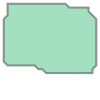

In [1270]:
shapely.geometry.Polygon(np.squeeze(contours[0]))


In [1271]:
contours

[array([[[374, 410]],
 
        [[373, 411]],
 
        [[372, 411]],
 
        [[371, 412]],
 
        [[364, 412]],
 
        [[363, 413]],
 
        [[363, 424]],
 
        [[364, 425]],
 
        [[364, 428]],
 
        [[379, 428]],
 
        [[380, 427]],
 
        [[385, 427]],
 
        [[385, 426]],
 
        [[387, 424]],
 
        [[387, 412]],
 
        [[386, 411]],
 
        [[386, 410]]], dtype=int32),
 array([[[384, 363]],
 
        [[384, 373]],
 
        [[385, 374]],
 
        [[395, 374]],
 
        [[395, 363]]], dtype=int32),
 array([[[342, 322]],
 
        [[342, 333]],
 
        [[344, 335]],
 
        [[355, 335]],
 
        [[356, 334]],
 
        [[358, 334]],
 
        [[358, 323]],
 
        [[356, 323]],
 
        [[355, 322]]], dtype=int32),
 array([[[217, 265]],
 
        [[217, 267]],
 
        [[216, 268]],
 
        [[209, 268]],
 
        [[209, 301]],
 
        [[211, 301]],
 
        [[212, 302]],
 
        [[212, 305]],
 
        [[214, 307]],
 
 

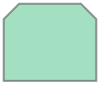

POLYGON ((258 287, 258 291, 259 292, 263 292, 264 291, 264 287, 258 287))
29.0
261 289
True
140.089257261219
aspect
31.130946058048664
31.130946058048664


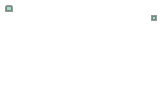

MULTIPOLYGON (((404 278, 404 282, 408 282, 408 278, 404 278)), ((258 287, 258 291, 259 292, 263 292, 264 291, 264 287, 258 287)))
True
72.00694410957877
aspect
16.001543135461947
16.001543135461947


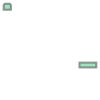

MULTIPOLYGON (((321 239, 321 243, 335 243, 335 239, 321 239)), ((258 287, 258 291, 259 292, 263 292, 264 291, 264 287, 258 287)))


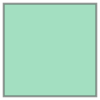

POLYGON ((404 278, 404 282, 408 282, 408 278, 404 278))
16.0
406 280
True
77.3692445355388
aspect
19.3423111338847
19.3423111338847


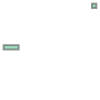

MULTIPOLYGON (((321 239, 321 243, 335 243, 335 239, 321 239)), ((404 278, 404 282, 408 282, 408 278, 404 278)))


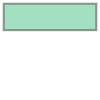

POLYGON ((321 239, 321 243, 335 243, 335 239, 321 239))
56.0
328 241


In [89]:
final_cont = []
import shapely.geometry
for ci in range(len(contours)):
    p = shapely.geometry.Polygon(np.squeeze(contours[ci]))
    display(p)
    print(p.convex_hull)
    print(p.convex_hull.area)
    centroid_ = np.array(p.centroid)
    x1,y1 = int(centroid_[0]), int(centroid_[1])
    print(x1, y1)
    θ = 0 * 3.14 / 180.0
    x2 = x1 + 5000 * math.cos(θ)
    y2 = y1 + 5000 * math.sin(θ) 
    line = shapely.geometry.LineString([[x1, y1], [x2, y2]])
    for cj in range(ci+1, len(contours)):
        poly1 = shapely.geometry.Polygon(np.squeeze(contours[cj]))
        if p.convex_hull.symmetric_difference(poly1.convex_hull):
            
            print(True)
            print(p.distance(poly1))
            final_cont.append(ci)
            final_cont.append(cj)
            print('aspect')
            box = p.minimum_rotated_rectangle

            # get coordinates of polygon vertices
            x, y = box.exterior.coords.xy

            # get length of bounding box edges
            edge_length = (shapely.geometry.Point(x[0], y[0]).distance(shapely.geometry.Point(x[1], y[1])), shapely.geometry.Point(x[1], y[1]).distance(shapely.geometry.Point(x[2], y[2])))
            # get width of polygon as the shortest edge of the bounding box
            p_width = min(edge_length)
            box = poly1.minimum_rotated_rectangle

            # get coordinates of polygon vertices
            x, y = box.exterior.coords.xy

            # get length of bounding box edges
            edge_length = (shapely.geometry.Point(x[0], y[0]).distance(shapely.geometry.Point(x[1], y[1])), shapely.geometry.Point(x[1], y[1]).distance(shapely.geometry.Point(x[2], y[2])))
            # get width of polygon as the shortest edge of the bounding box
            poly1_width = min(edge_length)
            
            print((p.distance(poly1))/(np.mean([p_width,poly1_width])))
            print(get_pair_aspect_ratio(p.convex_hull,poly1.convex_hull))

            

        else:
            print(False)
        display(p.symmetric_difference(poly1))
        print(poly1.symmetric_difference(p))
        
        # and θ should be in radians
        
        


In [85]:
def get_pair_aspect_ratio(p1,p2):
    
    def get_polygon_width(poly):
        box = poly.minimum_rotated_rectangle
        # get coordinates of polygon vertices
        x, y = box.exterior.coords.xy
        # get length of bounding box edges
        edge_length = (Point(x[0], y[0]).distance(Point(x[1], y[1])),Point(x[1], y[1]).distance(Point(x[2], y[2])))
        # get width of polygon as the shortest edge of the bounding box
        width = min(edge_length)
        return width
    p1_width = get_polygon_width(p1)
    p2_width = get_polygon_width(p2)
    
    return(p1.distance(p2))/(np.mean([p1_width,p2_width]))

In [1332]:
get_pair_aspect_ratio(p,poly1)

0.0

In [1219]:
box = p.minimum_rotated_rectangle

# get coordinates of polygon vertices
x, y = box.exterior.coords.xy

# get length of bounding box edges
edge_length = (shapely.geometry.Point(x[0], y[0]).distance(shapely.geometry.Point(x[1], y[1])), shapely.geometry.Point(x[1], y[1]).distance(shapely.geometry.Point(x[2], y[2])))

# get length of polygon as the longest edge of the bounding box
length = max(edge_length)

# get width of polygon as the shortest edge of the bounding box
width = min(edge_length)

In [1220]:
width

13.0

In [477]:
poly_to_bbox(np.squeeze(contours[0])

SyntaxError: unexpected EOF while parsing (<ipython-input-477-dbbe96cc09e3>, line 1)

In [478]:
box = p.minimum_rotated_rectangle
x, y = box.exterior.coords.xy

# get length of bounding box edges

In [31]:
p = shapely.geometry.Polygon(np.squeeze(final_cont[0][0]))
p2 = shapely.geometry.Polygon(np.squeeze(final_cont[0][1]))

IndexError: list index out of range

In [32]:
p.symmetric_difference(p2)

NameError: name 'p' is not defined

In [33]:
poly_to_bbox(final_cont[0][0])

NameError: name 'poly_to_bbox' is not defined

In [34]:
cv2.po

AttributeError: module 'cv2.cv2' has no attribute 'po'

In [35]:
len(final_cont)

0

In [36]:
poly1 = shapely.geometry.Polygon(np.squeeze(contours[1]))

NameError: name 'contours' is not defined

In [37]:
line = shapely.geometry.LineString([[x1, y1], [x2, y2]])

In [38]:
line.intersects(poly1)

NameError: name 'poly1' is not defined

In [39]:
[i  for i,f in enumerate(e_distance) if f- np.mean(e_distance) <10] 

NameError: name 'e_distance' is not defined

In [40]:
def poly_to_bbox(vertices):
    x1 = min([f[0] for f in vertices])
    y1 = min([f[1] for f in vertices])
    x2 = max([f[0] for f in vertices])
    y2 = max([f[1] for f in vertices])
    return [x1,y1,x2,y2]
for box in bbox:
    rect_cords = poly_to_bbox(box)
    x = int(rect_cords[0]+rect_cords[2] /2)
    y = int(rect_cords[1]+rect_cords[3] /2)
    print(x,y)
    cv2.rectangle(img, (rect_cords[0], rect_cords[1]), (rect_cords[2], rect_cords[3]), (0,255,144), 2)
    cv2.putText(img,"Brake.",(rect_cords[0] ,rect_cords[1]), font, 1.2,(0, 255, 255),2,cv2.LINE_AA)

plt.imshow(img)

NameError: name 'bbox' is not defined

In [41]:
yCenter

NameError: name 'yCenter' is not defined

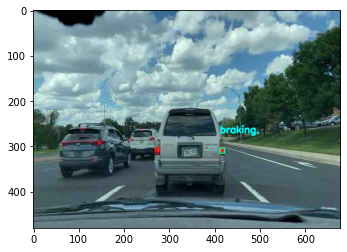

In [42]:
img = cv2.imread('brake_images/MicrosoftTeams-image (1).png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img,"braking.",(411 ,270), font, .7,(0, 255, 255),2,cv2.LINE_AA)
cv2.rectangle(img, (411, 303), (421, 315), (0,255,144), 2)
plt.imshow(img)

In [43]:
distance.euclidean((xCenter,yCenter),(cX, cY))

NameError: name 'distance' is not defined

In [44]:
cx[0]**2+cy[0]**2

NameError: name 'cx' is not defined

In [45]:
pairwise.euclidean_distances([(cX, cY)], Y=[extreme_left, extreme_right, extreme_top, extreme_bottom])[0]

NameError: name 'pairwise' is not defined

In [46]:
for i in range(len(contours)):
    color = (0, 255, 255)
    cv2.drawContours(img, contours, i, color,5)

NameError: name 'contours' is not defined

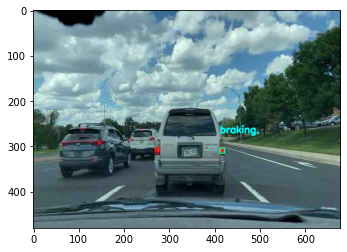

In [47]:
plt.imshow(img)

In [1]:
import cv2
import sys
import numpy as np

def nothing(x):
    pass

# Load in image
image = cv2.imread('sample2/frame1550.jpg')

# Create a window
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('HMin','image',0,179,nothing) # Hue is from 0-179 for Opencv
cv2.createTrackbar('SMin','image',0,255,nothing)
cv2.createTrackbar('VMin','image',0,255,nothing)
cv2.createTrackbar('HMax','image',0,179,nothing)
cv2.createTrackbar('SMax','image',0,255,nothing)
cv2.createTrackbar('VMax','image',0,255,nothing)

# Set default value for MAX HSV trackbars.
cv2.setTrackbarPos('HMax', 'image', 179)
cv2.setTrackbarPos('SMax', 'image', 255)
cv2.setTrackbarPos('VMax', 'image', 255)

# Initialize to check if HSV min/max value changes
hMin = sMin = vMin = hMax = sMax = vMax = 0
phMin = psMin = pvMin = phMax = psMax = pvMax = 0

output = image
wait_time = 33

while(1):

    # get current positions of all trackbars
    hMin = cv2.getTrackbarPos('HMin','image')
    sMin = cv2.getTrackbarPos('SMin','image')
    vMin = cv2.getTrackbarPos('VMin','image')

    hMax = cv2.getTrackbarPos('HMax','image')
    sMax = cv2.getTrackbarPos('SMax','image')
    vMax = cv2.getTrackbarPos('VMax','image')

    # Set minimum and max HSV values to display
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Create HSV Image and threshold into a range.
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    output = cv2.bitwise_and(image,image, mask= mask)

    # Print if there is a change in HSV value
    if( (phMin != hMin) | (psMin != sMin) | (pvMin != vMin) | (phMax != hMax) | (psMax != sMax) | (pvMax != vMax) ):
        print("(hMin = %d , sMin = %d, vMin = %d), (hMax = %d , sMax = %d, vMax = %d)" % (hMin , sMin , vMin, hMax, sMax , vMax))
        phMin = hMin
        psMin = sMin
        pvMin = vMin
        phMax = hMax
        psMax = sMax
        pvMax = vMax

    # Display output image
    cv2.imshow('image',output)

    # Wait longer to prevent freeze for videos.
    if cv2.waitKey(wait_time) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 204)


In [59]:

blackLower = (0 , 0 , 0)
blackUpper = (180 , 255 , 35)

def confirm_day_or_night(frame , flag_night_counter):
    blurred = cv2.GaussianBlur(frame, (25, 25), 0)
    hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, blackLower , blackUpper)
    mask = cv2.erode(mask, None, iterations=2)
    mask = cv2.dilate(mask , None, iterations=2)
#     cv2.imshow('black',mask)
    plt.imshow(mask)
    plt.show()
    pixel_ct = 0
    pixel_len = 0
    for i in mask:
        pixel_ct = pixel_ct + np.sum(i==0)
        pixel_len = pixel_len + len(i)
    ratio = pixel_ct / pixel_len
    print("ratio = ",ratio)
    if ratio < 0.68:
        flag_night_counter = flag_night_counter + 1
        return flag_night_counter
    else:
        flag_night_counter = flag_night_counter - 1 
        return flag_night_counter

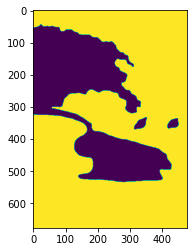

ratio =  0.29613446411012784


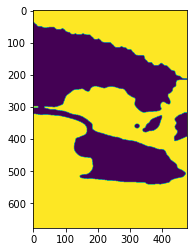

ratio =  0.36866396263520157


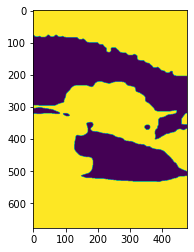

ratio =  0.33591752704031463


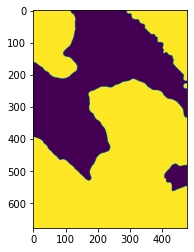

ratio =  0.3832565142576205


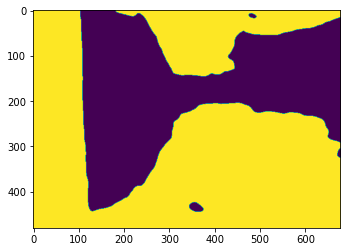

ratio =  0.38805002458210425


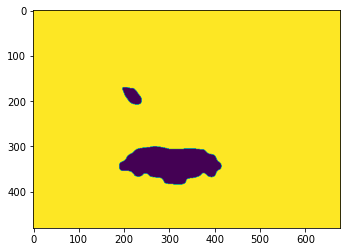

ratio =  0.04277286135693215


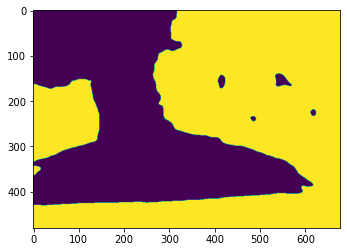

ratio =  0.4246927236971485


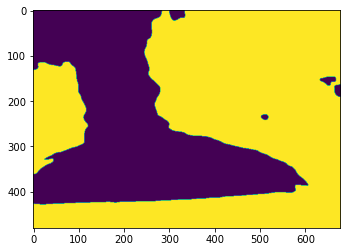

ratio =  0.3973389872173058


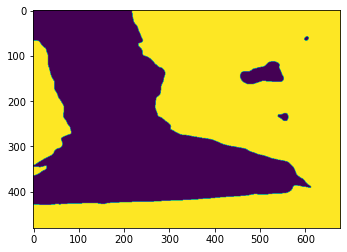

ratio =  0.42240658800393316


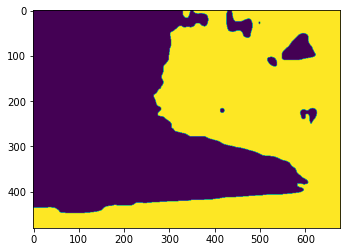

ratio =  0.5176315142576204


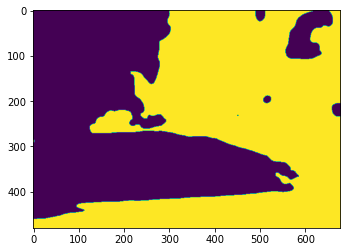

ratio =  0.47180432645034415


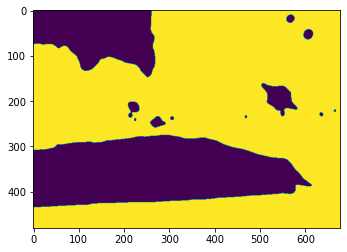

ratio =  0.32317477876106193


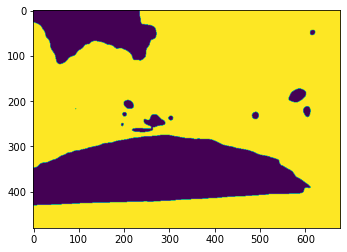

ratio =  0.2817754424778761


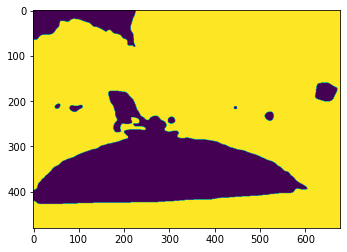

ratio =  0.25291912487708945


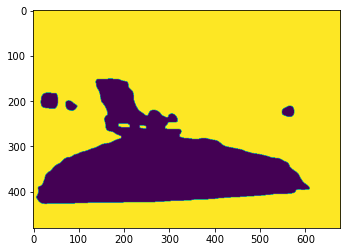

ratio =  0.24541543756145526


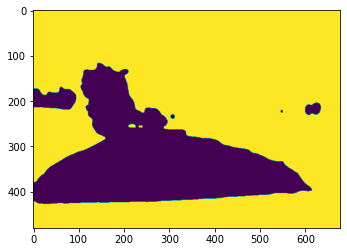

ratio =  0.2768559488692232


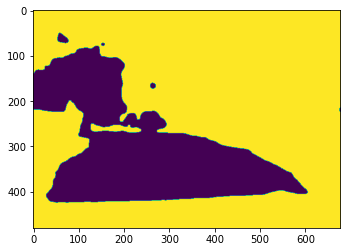

ratio =  0.2891285644051131


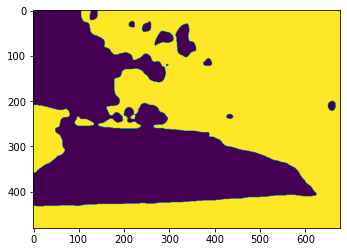

ratio =  0.39930862831858405


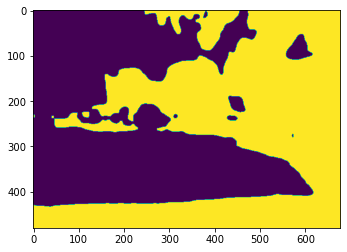

ratio =  0.49385140117994103


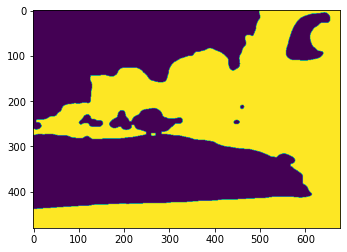

ratio =  0.4993946656833825


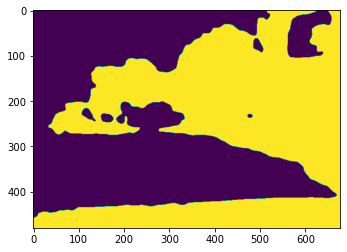

ratio =  0.5033738938053097


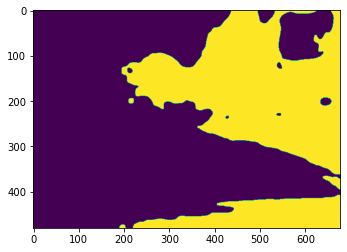

ratio =  0.6422720009832842


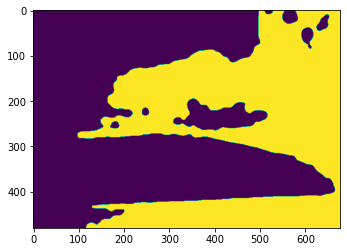

ratio =  0.5707810963618486


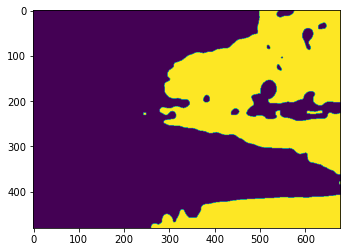

ratio =  0.6722928957718781


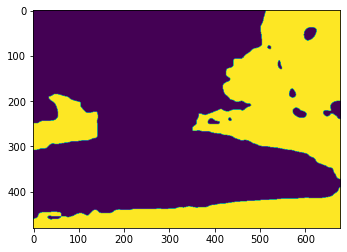

ratio =  0.6514073254670599


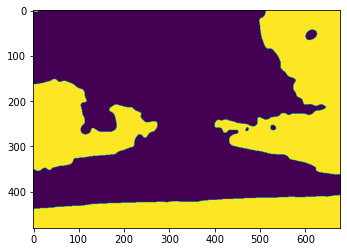

ratio =  0.6238200589970502


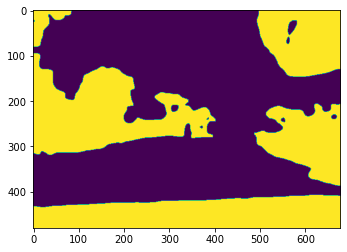

ratio =  0.5886891592920354


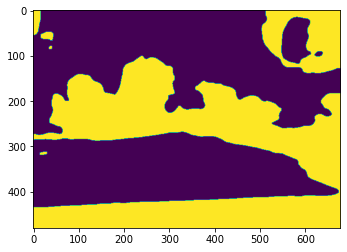

ratio =  0.585985127826942


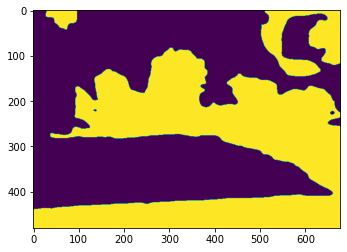

ratio =  0.5599219518190757


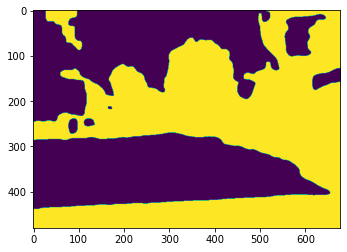

ratio =  0.49349496066863324


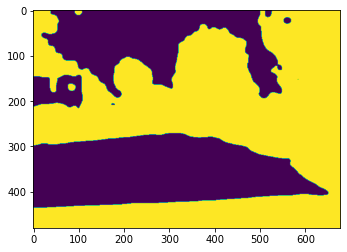

ratio =  0.4194137168141593


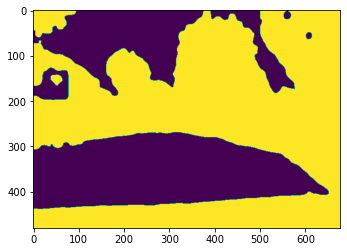

ratio =  0.39593780727630284


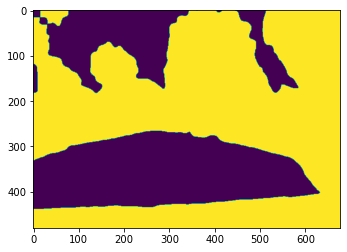

ratio =  0.37083947885939034


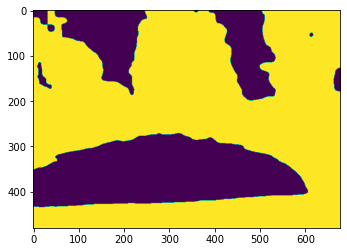

ratio =  0.3333210422812193


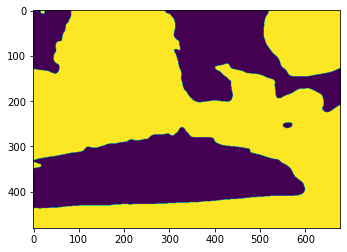

ratio =  0.3745298672566372


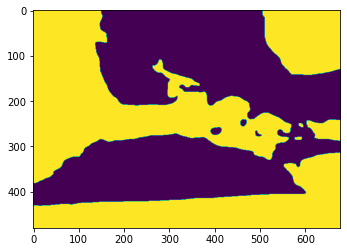

ratio =  0.4945827187807276


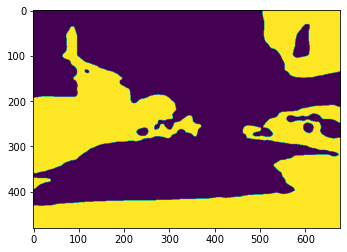

ratio =  0.5953355457227139


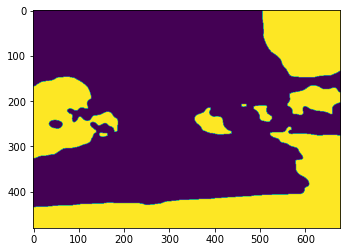

ratio =  0.6751812930186823


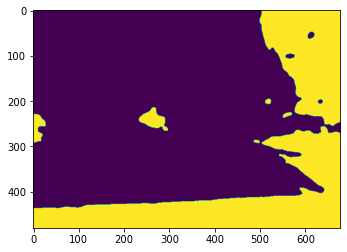

ratio =  0.7237094395280236


KeyboardInterrupt: 

In [60]:
i=0
intial_ct = 0
while True: 
    img = cv2.imread('nightBrake_light/frame{}.jpg'.format(i))
    intial_ct=confirm_day_or_night(img,intial_ct)
    i+=1

In [53]:
img = cv2.imread('sample2/frame1000.jpg')

In [60]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def nothing(x):
    pass

def main():

    window_name='color range parameter'
    cv2.namedWindow(window_name)
    # Create a black image, a window
    im = cv2.imread('nightBrake_light/frame131.jpg')
    hsv = cv2.cvtColor(im,cv2.COLOR_BGR2HSV)

    print ('lower_color = np.array([a1,a2,a3])')
    print ('upper_color = np.array([b1,b2,b3])')


    # create trackbars for color change
    cv2.createTrackbar('a1',window_name,0,255,nothing)
    cv2.createTrackbar('a2',window_name,0,255,nothing)
    cv2.createTrackbar('a3',window_name,0,255,nothing)

    cv2.createTrackbar('b1',window_name,150,255,nothing)
    cv2.createTrackbar('b2',window_name,150,255,nothing)
    cv2.createTrackbar('b3',window_name,150,255,nothing)

    while(1):
        a1 = cv2.getTrackbarPos('a1',window_name)
        a2 = cv2.getTrackbarPos('a2',window_name)
        a3 = cv2.getTrackbarPos('a3',window_name)

        b1 = cv2.getTrackbarPos('b1',window_name)
        b2 = cv2.getTrackbarPos('b2',window_name)
        b3 = cv2.getTrackbarPos('b3',window_name)

        # hsv hue sat value
        lower_color = np.array([a1,a2,a3])
        upper_color = np.array([b1,b2,b3])
        mask = cv2.inRange(hsv, lower_color, upper_color)
        res = cv2.bitwise_and(im, im, mask = mask)

        cv2.imshow('mask',mask)
        cv2.imshow('res',res)
        cv2.imshow('im',im)

        k = cv2.waitKey(1) & 0xFF
        if k == 27:         # wait for ESC key to exit
            break
        elif k == ord('s'): # wait for 's' key to save and exit
            cv2.imwrite('Img_screen_mask.jpg',mask)
            cv2.imwrite('Img_screen_res.jpg',res)
            break


    cv2.destroyAllWindows()


#Run Main
if __name__ == "__main__" :
    main()

lower_color = np.array([a1,a2,a3])
upper_color = np.array([b1,b2,b3])
